In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cars24data.csv')

In [3]:
data.head()

,Unnamed: 0,Brand,Transmission,Fuel,Kms,Price,year
0,0,2013 Maruti Swift,Manual,Diesel,"65,561 km","3,32,699",2013
1,1,2016 Maruti Swift,Manual,Petrol,"58,818 km","4,07,599",2016
2,2,2014 Maruti Swift Dzire,Manual,Diesel,"55,542 km","3,43,799",2014
3,3,2018 Maruti Vitara Brezza,Manual,Diesel,"71,192 km","6,74,099",2018
4,4,2014 Maruti Swift Dzire,Manual,Diesel,"55,542 km","3,43,799",2014


## Data cleaning

In [4]:
data.isnull().sum()

Unnamed: 0      0
Brand           0
Transmission    0
Fuel            0
Kms             0
Price           0
year            0
dtype: int64

In [5]:
data['Brand'].value_counts()

2013 Maruti Swift            362
2019 Hyundai NEW SANTRO      307
2014 Honda Amaze             276
2014 Maruti Swift Dzire      269
2015 Maruti Swift            245
2019 Maruti Alto K10         243
2019 Tata Tiago              231
2017 Maruti Swift            146
2020 Ford Ecosport           145
2017 Hyundai Creta           143
2016 Mahindra Scorpio        129
2013 Hyundai New Elantra     128
2018 Maruti Vitara Brezza    124
2014 Maruti Alto K10         121
2014 Hyundai New Elantra     113
2015 Hyundai Creta            88
2019 Hyundai VENUE            73
2019 MG HECTOR                72
2017 Maruti Vitara Brezza     72
2019 Honda City               72
2013 Honda City               72
2018 Mahindra XUV500          72
2013 Ford Ecosport            72
2015 Honda Amaze              68
2012 Maruti Swift Dzire       66
2015 Ford Ecosport            65
2020 Maruti Alto              62
2017 Maruti Ciaz              59
2014 Hyundai Grand i10        57
2017 Maruti Swift Dzire       55
2011 Toyot

In [6]:
data['Transmission'].value_counts()

Manual       3710
Automatic     647
-               6
Name: Transmission, dtype: int64

In [7]:
data['Fuel'].value_counts()

Diesel    2284
Petrol    2073
-            6
Name: Fuel, dtype: int64

In [8]:
data['Kms'].value_counts()

31,538 km    270
10,395 km    243
5,503 km     235
19,172 km    231
65,561 km    145
            ... 
90,004 km      6
-              6
59,041 km      5
31,505 km      5
48,823 km      3
Name: Kms, Length: 66, dtype: int64

In [9]:
data['Price'].value_counts()

4,75,099    270
4,27,199    243
5,16,799    235
5,14,499    231
3,32,699    145
           ... 
-             6
3,38,699      6
4,84,199      5
4,05,499      5
5,08,399      3
Name: Price, Length: 66, dtype: int64

In [10]:
data['year'].value_counts()

2019    998
2014    893
2013    713
2015    552
2017    519
2020    207
2018    197
2016    169
2012     66
2011     43
-         6
Name: year, dtype: int64

#### There is some missing value in data that is present by dash(-) so we will change it to NONE and then remove it

In [11]:
data = data.replace('-',np.NAN)

In [12]:
data['year'].value_counts()

2019    998
2014    893
2013    713
2015    552
2017    519
2020    207
2018    197
2016    169
2012     66
2011     43
Name: year, dtype: int64

In [13]:
data.isnull().sum()

Unnamed: 0      0
Brand           6
Transmission    6
Fuel            6
Kms             6
Price           6
year            6
dtype: int64

##### as there are only 6 value which are missing so we can drop it

In [14]:
data = data.dropna()

In [15]:
data.shape

(4357, 7)

In [16]:
data.head()

,Unnamed: 0,Brand,Transmission,Fuel,Kms,Price,year
0,0,2013 Maruti Swift,Manual,Diesel,"65,561 km","3,32,699",2013
1,1,2016 Maruti Swift,Manual,Petrol,"58,818 km","4,07,599",2016
2,2,2014 Maruti Swift Dzire,Manual,Diesel,"55,542 km","3,43,799",2014
3,3,2018 Maruti Vitara Brezza,Manual,Diesel,"71,192 km","6,74,099",2018
4,4,2014 Maruti Swift Dzire,Manual,Diesel,"55,542 km","3,43,799",2014


#### droping unneccessary column i.e. Unnamed:0

In [17]:
data = data.drop(columns=['Unnamed: 0'])

## Encoding 

### applying label encoding 

In [18]:
data.columns

Index(['Brand', 'Transmission', 'Fuel', 'Kms', 'Price', 'year'], dtype='object')

In [19]:
data

,Brand,Transmission,Fuel,Kms,Price,year
0,2013 Maruti Swift,Manual,Diesel,"65,561 km","3,32,699",2013
1,2016 Maruti Swift,Manual,Petrol,"58,818 km","4,07,599",2016
2,2014 Maruti Swift Dzire,Manual,Diesel,"55,542 km","3,43,799",2014
3,2018 Maruti Vitara Brezza,Manual,Diesel,"71,192 km","6,74,099",2018
4,2014 Maruti Swift Dzire,Manual,Diesel,"55,542 km","3,43,799",2014
...,...,...,...,...,...,...
4358,2013 Hyundai New Elantra,Manual,Diesel,"47,959 km","6,60,999",2013
4359,2013 BMW 5 Series,Automatic,Diesel,"46,477 km","18,17,799",2013
4360,2016 Mahindra Scorpio,Manual,Diesel,"51,588 km","8,75,899",2016
4361,2019 Hyundai VENUE,Manual,Petrol,"31,118 km","8,67,899",2019


In [20]:
Km = []
for i in data.Kms:
    Km.append(i.split(' ')[0].replace(',',''))
data["KM"] = Km

In [21]:
price = []
for i in data.Price:
    price.append(i.replace(',',''))
data["price"] = price

In [22]:
data.drop(columns='Kms',inplace = True)

In [23]:
data.drop(columns='Price',inplace=True)

In [24]:
data.head()

,Brand,Transmission,Fuel,year,KM,price
0,2013 Maruti Swift,Manual,Diesel,2013,65561,332699
1,2016 Maruti Swift,Manual,Petrol,2016,58818,407599
2,2014 Maruti Swift Dzire,Manual,Diesel,2014,55542,343799
3,2018 Maruti Vitara Brezza,Manual,Diesel,2018,71192,674099
4,2014 Maruti Swift Dzire,Manual,Diesel,2014,55542,343799


In [25]:
data.dtypes

Brand           object
Transmission    object
Fuel            object
year            object
KM              object
price           object
dtype: object

### All columns are object type we will change it in int which are numeric in data

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
lab_enc = LabelEncoder()
data['Brand'] = lab_enc.fit_transform(data['Brand'])
data['Transmission'] = lab_enc.fit_transform(data['Transmission'])
data['Fuel'] = lab_enc.fit_transform(data['Fuel'])

In [28]:
data.dtypes

Brand            int32
Transmission     int32
Fuel             int32
year            object
KM              object
price           object
dtype: object

In [29]:
data.head()

,Brand,Transmission,Fuel,year,KM,price
0,7,1,0,2013,65561,332699
1,28,1,1,2016,58818,407599
2,17,1,0,2014,55542,343799
3,38,1,0,2018,71192,674099
4,17,1,0,2014,55542,343799


In [30]:
data.price = data.price.astype(int)

In [31]:
data.year = data.year.astype(int)

In [32]:
data.KM = data.KM.astype(int)

In [33]:
data.dtypes

Brand           int32
Transmission    int32
Fuel            int32
year            int32
KM              int32
price           int32
dtype: object

## Data visualization(EDA) and data analysis

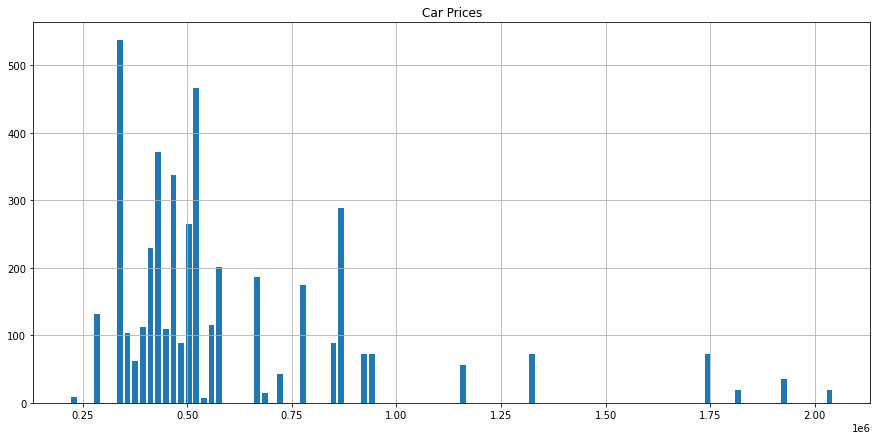

In [34]:
data['price'].hist(bins=100,figsize=(15,7),rwidth = 0.75)
plt.title('Car Prices')
plt.show()

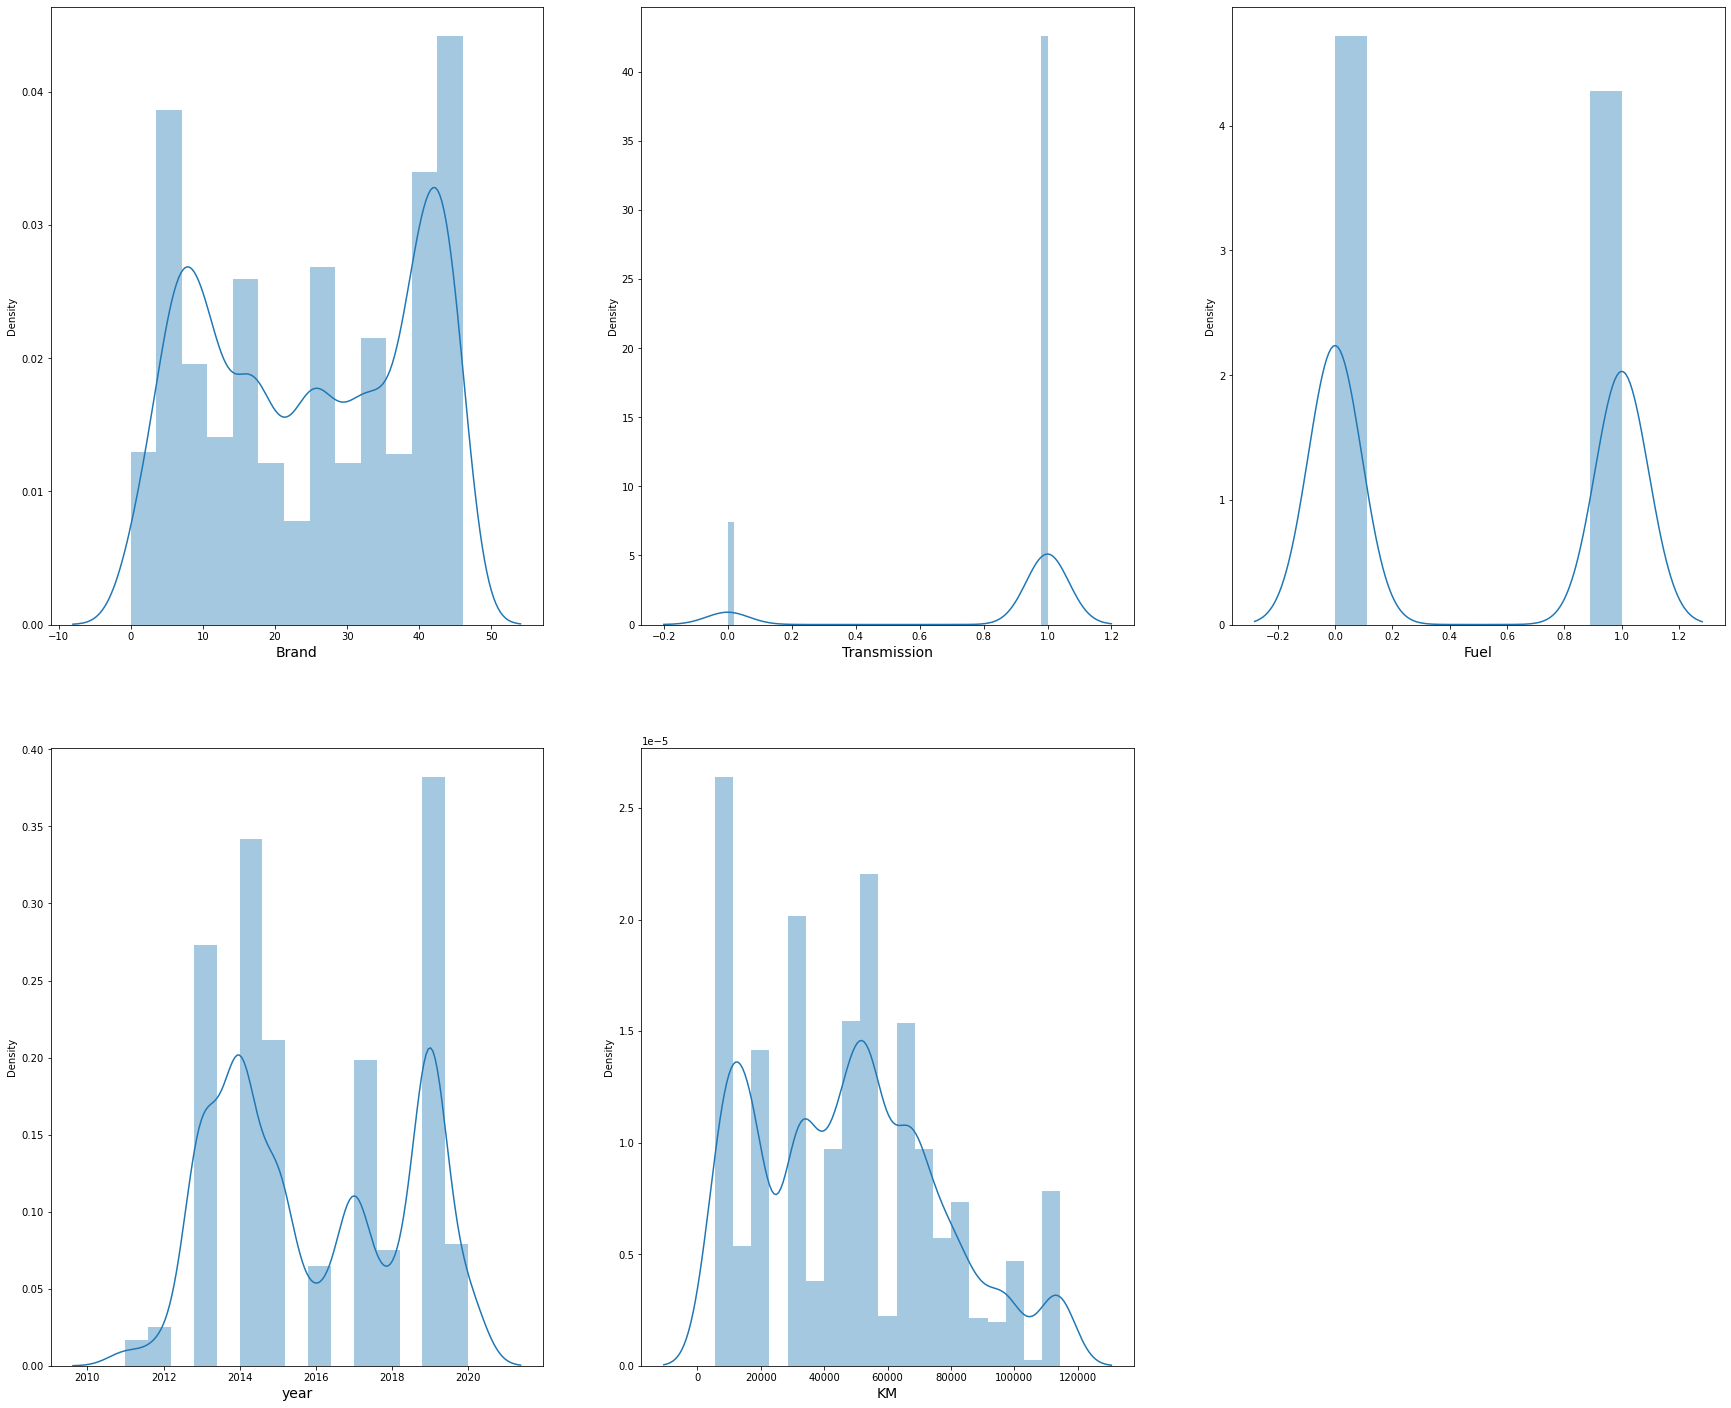

In [35]:
plt.figure(figsize=(30,25))
plotnumber = 1

for column in data:
    if plotnumber < 6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber +=1
plt.show()

### all columns are categorical in nature except price which is continous in nature

In [36]:
data.corr()['price'].sort_values(ascending=False)

price           1.000000
year            0.298086
Brand           0.267292
KM             -0.091729
Fuel           -0.179202
Transmission   -0.402541
Name: price, dtype: float64

<AxesSubplot:title={'center':'Correlation with price'}>

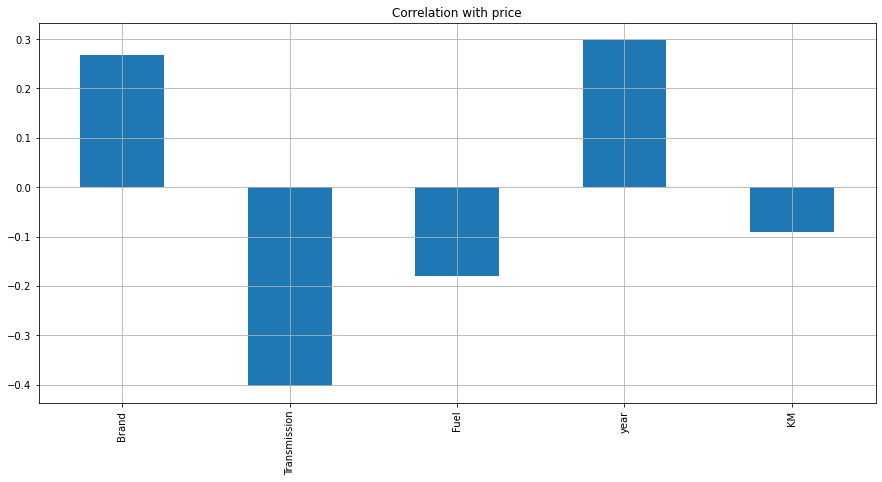

In [37]:
# visualize the correlation
data.drop('price', axis =1).corrwith(data['price']).plot(kind ='bar',grid = True, figsize = (15,7),
                                                   title = 'Correlation with price')

<function matplotlib.pyplot.show(close=None, block=None)>

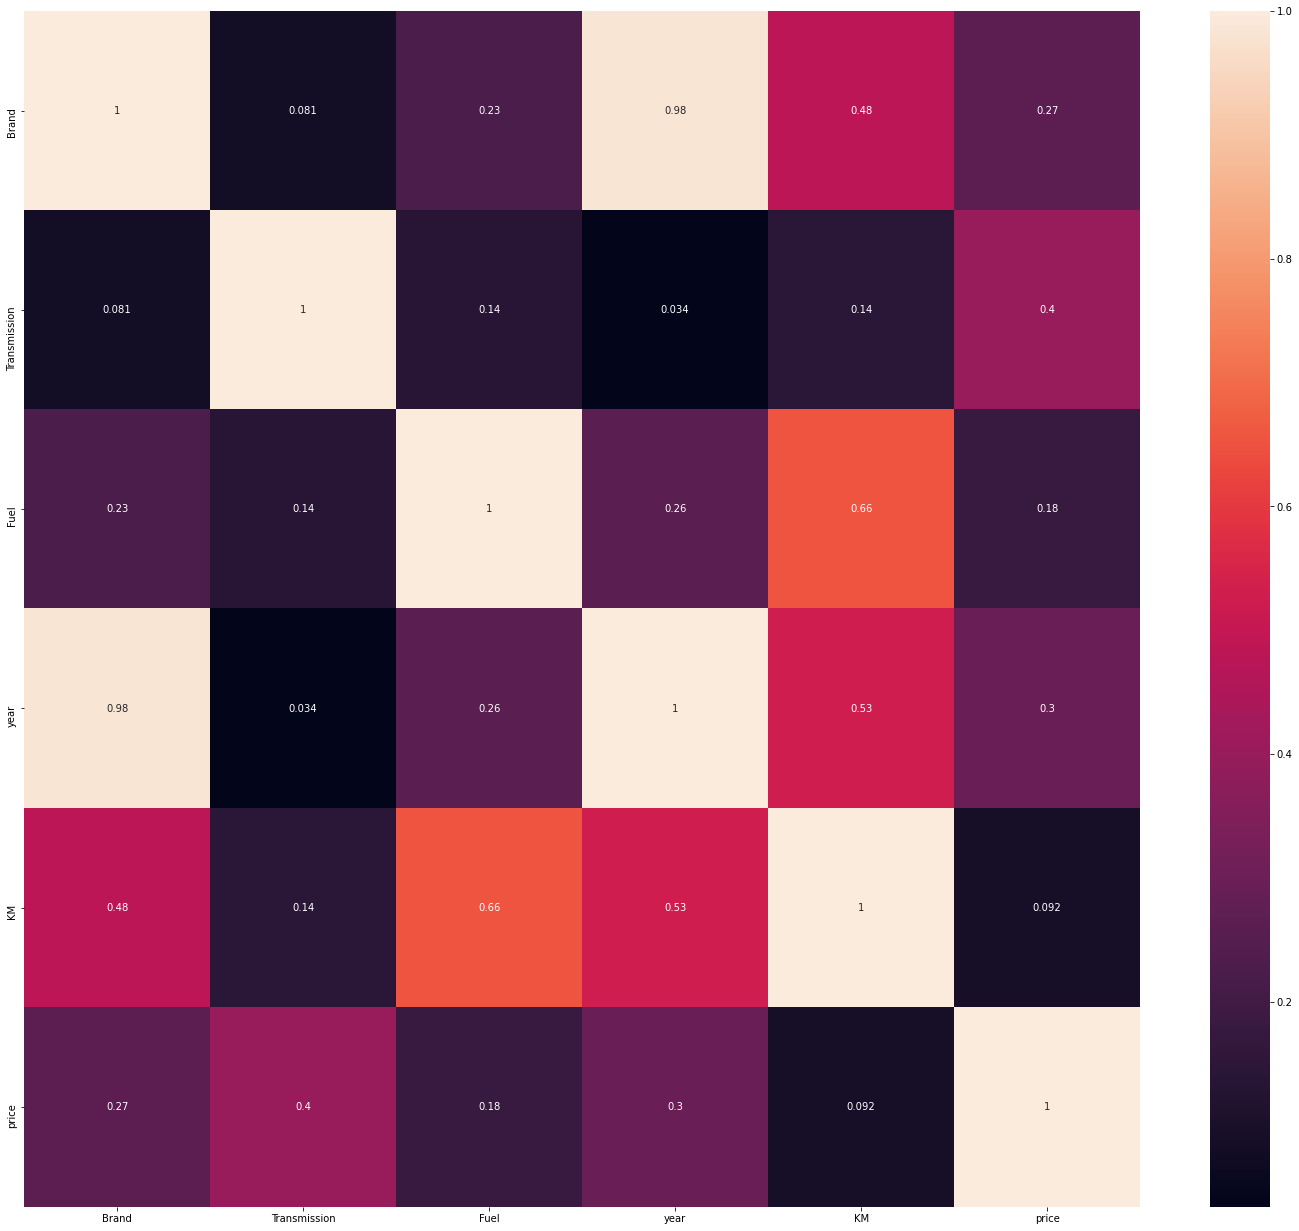

In [38]:
### plotting heatmap
plt.figure(figsize=(25,22))
sns.heatmap(abs(data.corr()),annot=True)
plt.show

## Bi variate analysis

<AxesSubplot:xlabel='Brand', ylabel='year'>

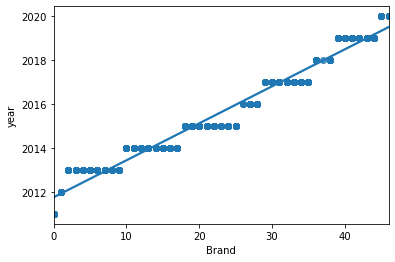

In [39]:
sns.regplot(y='year',x='Brand',data=data)

<AxesSubplot:xlabel='Brand', ylabel='price'>

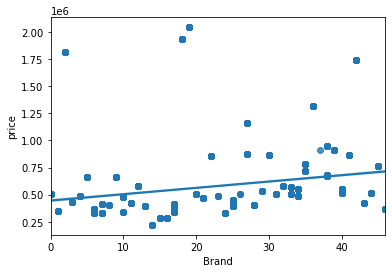

In [40]:
sns.regplot(y='price',x='Brand',data=data)

<AxesSubplot:xlabel='Transmission', ylabel='price'>

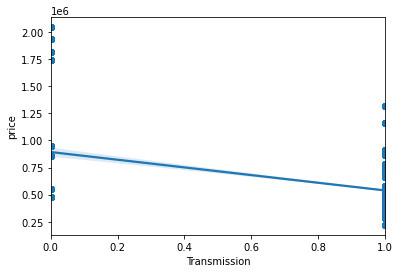

In [41]:
sns.regplot(y='price',x='Transmission',data=data)

#### It can be have multicolinearity problem we will check it out by vif value

## checking for outliers

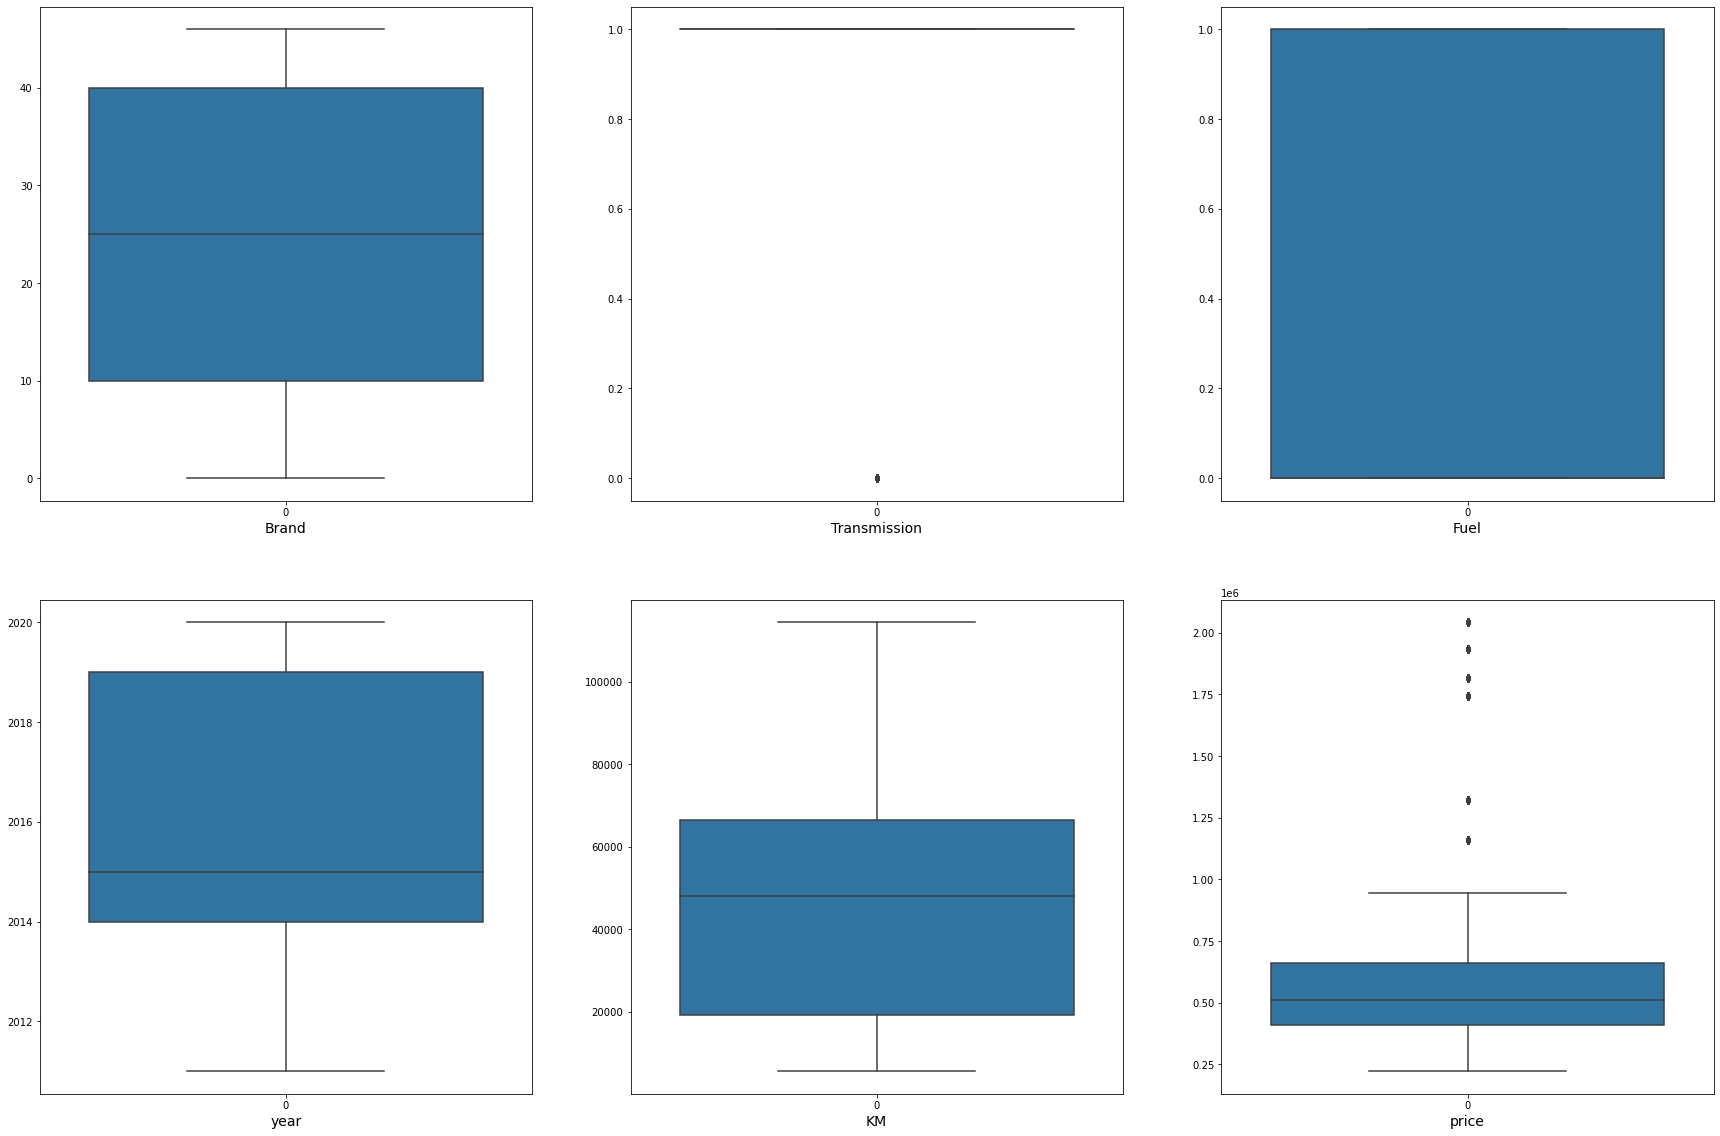

In [42]:
plt.figure(figsize=(30,20))
graph=1

for column in data:
    if graph<=6:
        ax=plt.subplot(2,3,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=14)
    graph+=1
plt.show()

### Target column is having outliers which should be treated before training the model

# Data normalization
##### Removing skewness(power transforme)

In [43]:
features = ['price']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
data[features]  = pt.fit_transform(data[features].values)
data.head()

,Brand,Transmission,Fuel,year,KM,price
0,7,1,0,2013,65561,-1.406832
1,28,1,1,2016,58818,-0.641891
2,17,1,0,2014,55542,-1.273344
3,38,1,0,2018,71192,0.739474
4,17,1,0,2014,55542,-1.273344


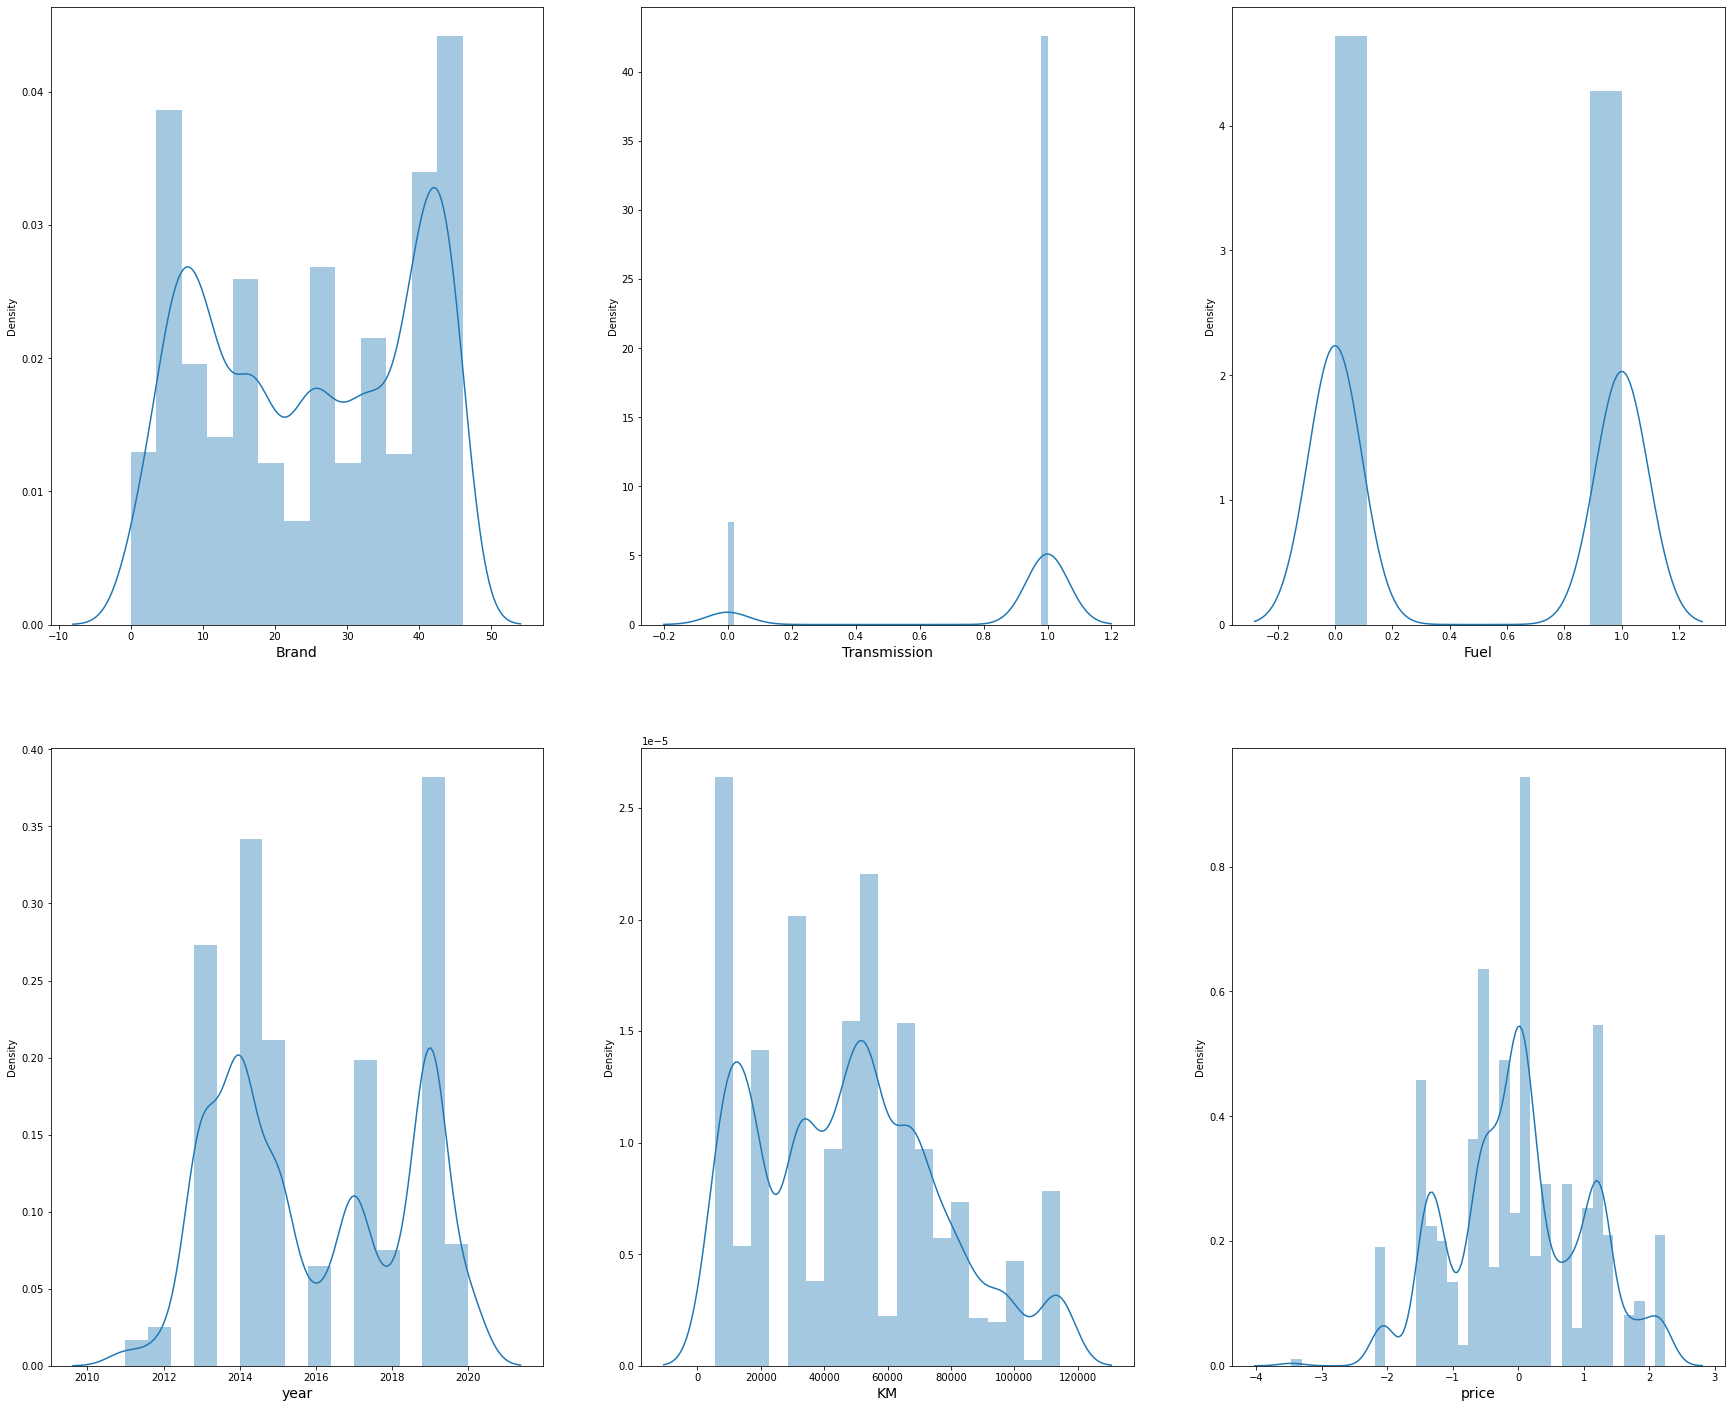

In [44]:
plt.figure(figsize=(30,25))
plotnumber = 1

for column in data:
    if plotnumber <= 6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber +=1
plt.show()

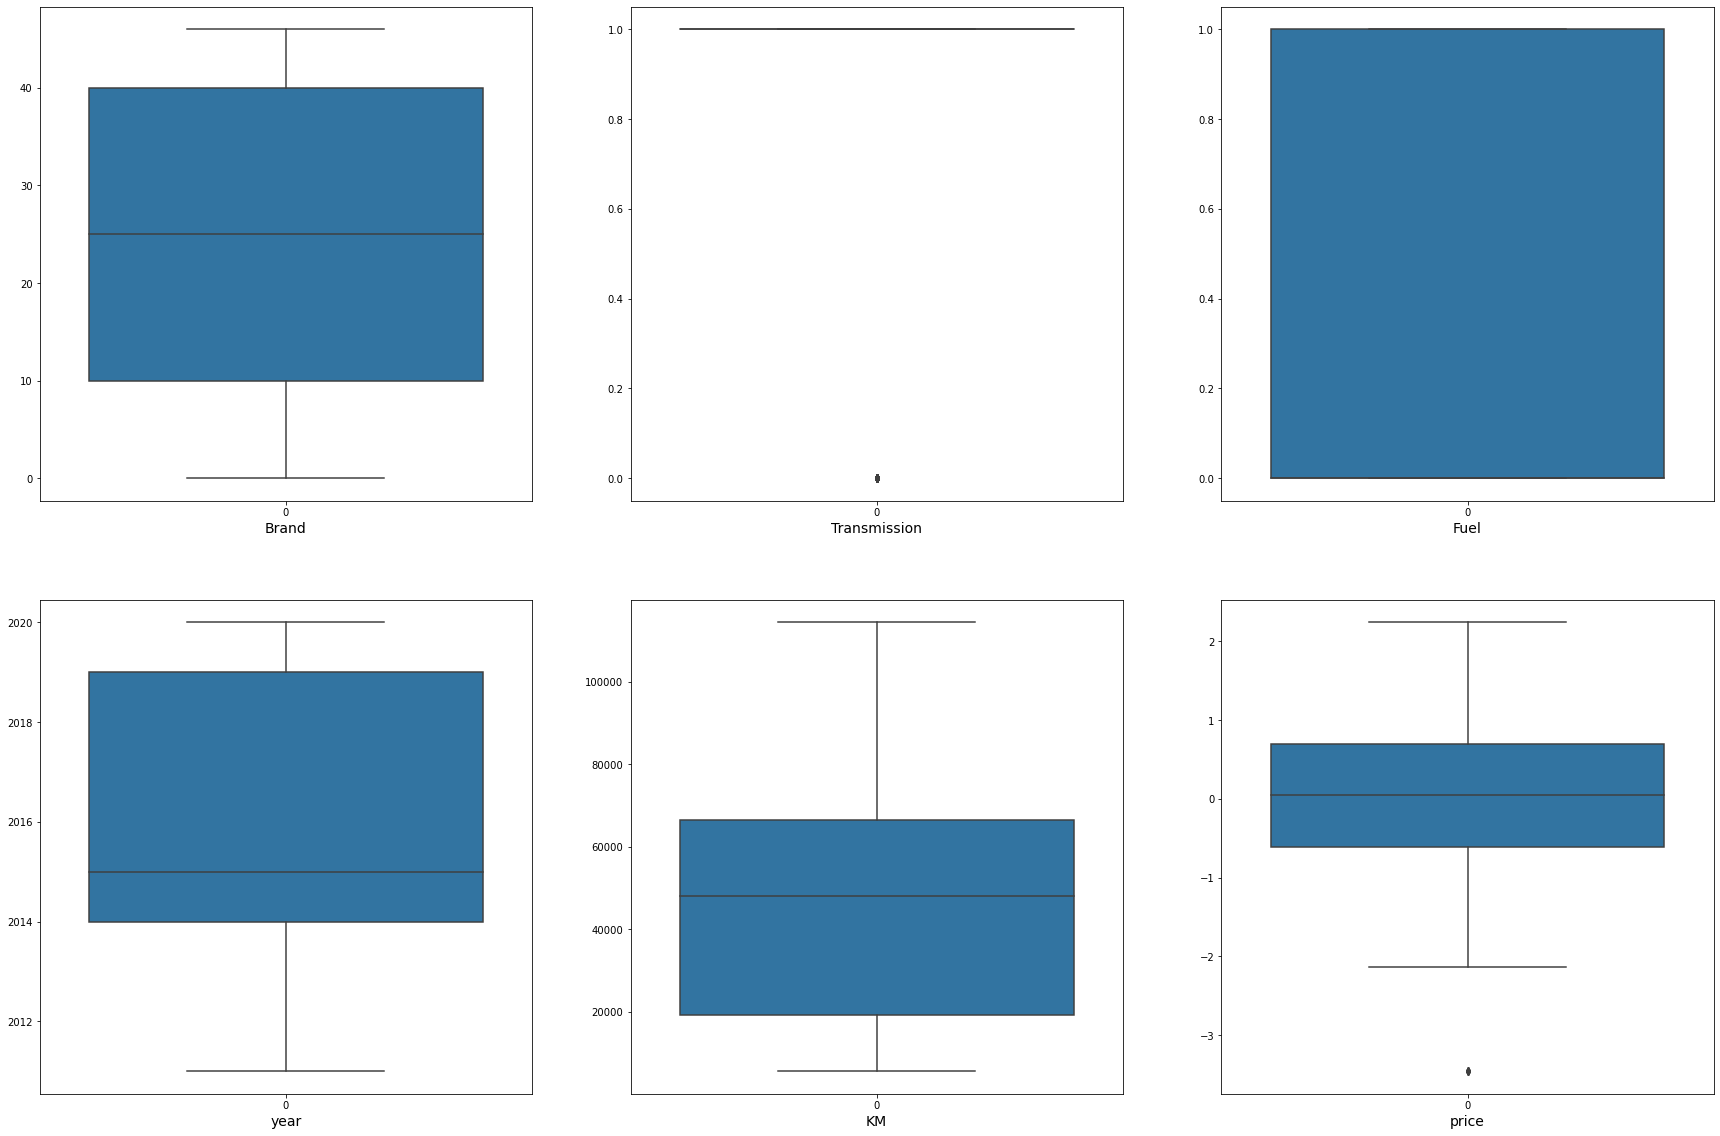

In [45]:
plt.figure(figsize=(30,20))
graph=1

for column in data:
    if graph<=6:
        ax=plt.subplot(2,3,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=14)
    graph+=1
plt.show()

In [46]:
X = data.drop(columns = ['price'],axis=1)
y = data['price']

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[1]

array([0.21727438, 0.41760452, 1.0496594 , 0.02066029, 0.38061861])

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

# lets check the vif
vif

,vif,Features
0,31.830620,Brand
1,1.091228,Transmission
2,1.791599,Fuel
3,33.410995,year
4,2.370920,KM


#### we can keep only one feature as Brand is contributing more we take brand

In [51]:
data.drop(columns=['KM'],axis=1,inplace=True)

## Model building

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [53]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train) 
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',r2_score(y_train,pred_train)*100)
        print('Testing accuracy score is',r2_score(y_test,pred_test)*100)

At random state 49 model perform very well
At random state 49
Training accuracy score is 43.97103190030715
Testing accuracy score is 44.03697406865906
At random state 80 model perform very well
At random state 80
Training accuracy score is 43.964247862534975
Testing accuracy score is 43.980026900318194
At random state 125 model perform very well
At random state 125
Training accuracy score is 43.970414069362576
Testing accuracy score is 43.98915224177647
At random state 131 model perform very well
At random state 131
Training accuracy score is 43.94239015927731
Testing accuracy score is 43.86757866377889
At random state 144 model perform very well
At random state 144
Training accuracy score is 43.97079097027148
Testing accuracy score is 44.02167237917583
At random state 239 model perform very well
At random state 239
Training accuracy score is 43.970073299100534
Testing accuracy score is 44.00519576296775
At random state 259 model perform very well
At random state 259
Training accuracy 

### Random_State = 990

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=990)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Accuracy: %.2f' % r2_score(y_test, y_pred))

RMSE : 0.7660990100899311
Accuracy: 0.44


In [56]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
las = Lasso()
las.fit(x_train,y_train)
pred = las.predict(x_test)
# finding the mean squared error and variance
mse = mean_squared_error(y_test, pred)
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Accuracy: %.2f' % r2_score(y_test, y_pred))

RMSE : 0.7660990100899311
Accuracy: 0.44


In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# predicting the test set results
y_pred = rf.predict(x_test)


# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Accuracy: %.2f' % r2_score(y_test, y_pred))

RMSE : 0.0083974045578715
Accuracy: 1.00


In [58]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

# predicting the test set results
y_pred = gb.predict(x_test)


# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Accuracy: %.2f' % r2_score(y_test, y_pred))

RMSE : 0.15300996151349824
Accuracy: 0.98


In [59]:
from xgboost import XGBRegressor
xgbt = XGBRegressor()
xgbt.fit(x_train,y_train)
# predicting the  test set results
y_pred = xgbt.predict(x_test)
# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Accuracy: %.2f' % r2_score(y_test, y_pred))

RMSE : 0.00029756448157031845
Accuracy: 1.00


In [60]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

# predicting the x test results
y_pred = svr.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print('Accuracy: %.2f' % r2_score(y_test, y_pred))

RMSE : 0.9984527937747419
Accuracy: 0.05


### Results are good for Random forest and XtremeGradient boosting

## we will check cross validation score for all algorithm

In [61]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr, X, y, cv=5)
print("Cross validation score of linear regression model is",scr.mean()*100)

Cross validation score of linear regression model is 43.7889662667941


In [62]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(las, X, y, cv=5)
print("Cross validation score of lasso regression model is",scr.mean()*100)

Cross validation score of lasso regression model is 16.070817635292798


In [63]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of Random forest regression model is",scr.mean()*100)

Cross validation score of Random forest regression model is 99.8283650430844


In [64]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(svr, X, y, cv=5)
print("Cross validation score of Support vector machine regression model is",scr.mean()*100)

Cross validation score of Support vector machine regression model is 8.358101758901434


In [65]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X, y, cv=5)
print("Cross validation score of Support vector machine regression model is",scr.mean()*100)

Cross validation score of Support vector machine regression model is 97.79044508760546


In [66]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X, y, cv=5)
print("Cross validation score of Support vector machine regression model is",scr.mean()*100)

Cross validation score of Support vector machine regression model is 99.7510290629981


### GridSearchCV - Hypertuning the random forest model

In [67]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in Gridsearchcv
parameter ={'min_weight_fraction_leaf':np.arange(0.0,0.3,0.1),
            'min_samples_split':range(2,4),
            'min_samples_leaf':range(1,3),
            'n_estimators':range(120,140)
           }

In [68]:
GCV = GridSearchCV(rf,parameter,cv=5,scoring='accuracy')

GCV.fit(x_train,y_train)  #fitting the data in model
GCV.best_params_          #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting with best parameter 
# finding the mean squared error and variance
mse = mean_squared_error(y_test, GCV_pred)
print("RMSE :",np.sqrt(mse))
print('R2 score: %.2f' % r2_score(y_test, GCV_pred))

RMSE : 0.005125982637382303
R2 score: 1.00


In [69]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

## as we can see the RMSE value of main model is good we will take default values of random forest model

In [70]:
import joblib
joblib.dump(GCV.best_estimator_,'CAR price prediction.pkl')

['CAR price prediction.pkl']